In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poralikha","key":"79169b3029d199799a5ee16330f777e3"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           1948        190  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data               763KB  2023-11-21 17:56:32           8735        153  1.0              
everydaycodings/produce-prices-dataset                              Fruits and Vegetables Prices Dataset        232KB  2023-12-11 13:40:33           1384         29  1.0              
thedevastator/books-sales-and-ratings                               Books Sales 

In [5]:
!kaggle datasets download -d omermetinn/tweets-about-the-top-companies-from-2015-to-2020
!kaggle datasets download -d suyashlakhani/apple-stock-prices-20152020

100% 277M/278M [00:02<00:00, 113MB/s] 
100% 278M/278M [00:02<00:00, 102MB/s]
  0% 0.00/66.9k [00:00<?, ?B/s]
100% 66.9k/66.9k [00:00<00:00, 37.0MB/s]


In [6]:
!mkdir tweets

In [8]:
!unzip tweets-about-the-top-companies-from-2015-to-2020.zip -d tweets
!unzip apple-stock-prices-20152020.zip -d tweets

Archive:  tweets-about-the-top-companies-from-2015-to-2020.zip
replace tweets/Company.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets/Company_Tweet.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tweets/Tweet.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  apple-stock-prices-20152020.zip
  inflating: tweets/AAPL.csv         


In [9]:
cd/content/tweets/

/content/tweets


In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler, StandardScaler
import datetime as dt

from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Uyarıları görmezden gelme!
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Veri setinin python ile okunması!
df = pd.read_csv("AAPL.csv")
df.head()

Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  
2   50884452      0.0          1.0  
3   32112797      0.0          1.0  
4   33667627      0.0          1.0

In [12]:
# İşimize yaramayacak kolonları çıkarıyoruz!
df = df.drop(["Unnamed: 0", "symbol", "divCash", "splitFactor"], axis = 1)
df.head()

date    close     high     low    open    volume  \
0  2015-05-27 00:00:00+00:00  132.045  132.260  130.05  130.34  45833246   
1  2015-05-28 00:00:00+00:00  131.780  131.950  131.10  131.86  30733309   
2  2015-05-29 00:00:00+00:00  130.280  131.450  129.90  131.23  50884452   
3  2015-06-01 00:00:00+00:00  130.535  131.390  130.05  131.20  32112797   
4  2015-06-02 00:00:00+00:00  129.960  130.655  129.32  129.86  33667627   

     adjClose     adjHigh      adjLow     adjOpen  adjVolume  
0  121.682558  121.880685  119.844118  120.111360   45833246  
1  121.438354  121.595013  120.811718  121.512076   30733309  
2  120.056069  121.134251  119.705890  120.931516   50884452  
3  120.291057  121.078960  119.844118  120.903870   32112797  
4  119.761181  120.401640  119.171406  119.669029   33667627

In [13]:
# date değeri olmadan ayrı bir veri seti oluyoruz!
df_not_date = df.drop(["date"], axis=1)
df_not_date.head()

close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23  50884452  120.056069  121.134251   
3  130.535  131.390  130.05  131.20  32112797  120.291057  121.078960   
4  129.960  130.655  129.32  129.86  33667627  119.761181  120.401640   

       adjLow     adjOpen  adjVolume  
0  119.844118  120.111360   45833246  
1  120.811718  121.512076   30733309  
2  119.705890  120.931516   50884452  
3  119.844118  120.903870   32112797  
4  119.171406  119.669029   33667627

In [14]:
# İşlev, veri kümesini analiz etmek içindir.
def InfofData(dataframe):
    print("############## Head ##############")
    print(dataframe.head())
    print("\n")
    print("############## Tail ##############")
    print(dataframe.head())
    print("\n")
    print("############## Info ##############")
    print(dataframe.info())
    print("\n")
    print("############## Shape ##############")
    print(dataframe.shape)
    print("\n")
    print("############## Columns Name ##############")
    print(dataframe.columns)
    print("\n")
    print("############## Describe ##############")
    print(dataframe.describe().T)
    print("\n")
    print("############## Null ##############")
    print(dataframe.isnull().sum())

In [15]:
InfofData(df_not_date)

############## Head ##############
     close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23  50884452  120.056069  121.134251   
3  130.535  131.390  130.05  131.20  32112797  120.291057  121.078960   
4  129.960  130.655  129.32  129.86  33667627  119.761181  120.401640   

       adjLow     adjOpen  adjVolume  
0  119.844118  120.111360   45833246  
1  120.811718  121.512076   30733309  
2  119.705890  120.931516   50884452  
3  119.844118  120.903870   32112797  
4  119.171406  119.669029   33667627  


############## Tail ##############
     close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23 

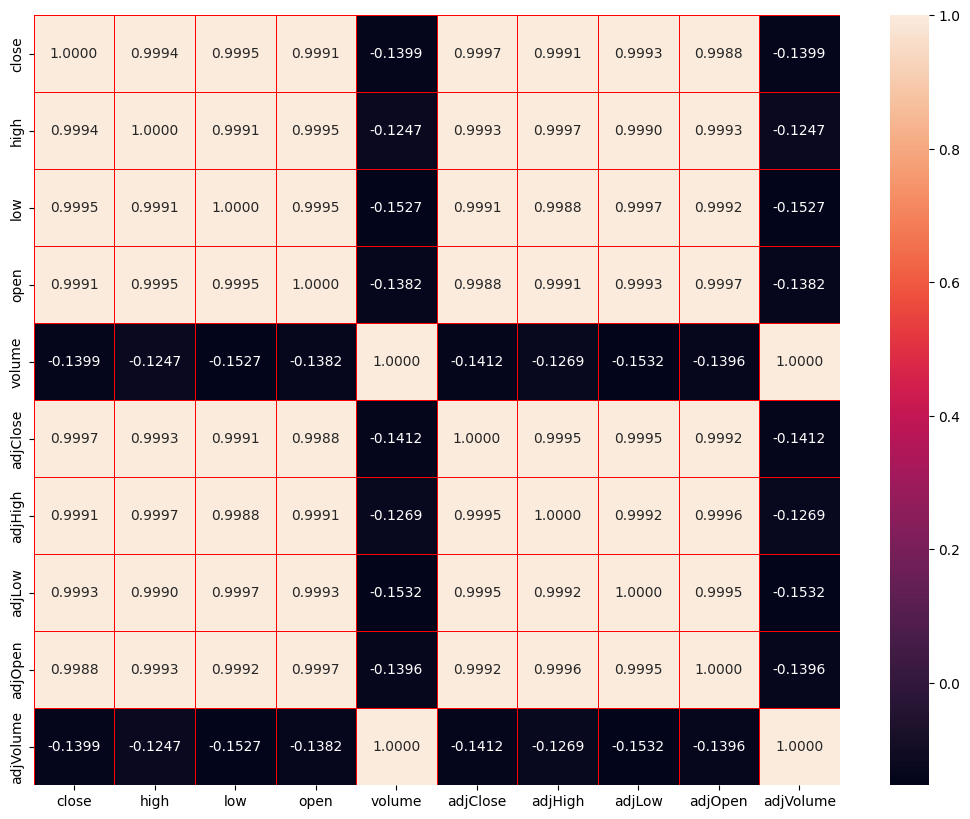

In [16]:
f,ax=plt.subplots(figsize=(13,10))
sns.heatmap(df_not_date.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".4f",ax=ax)
plt.show()

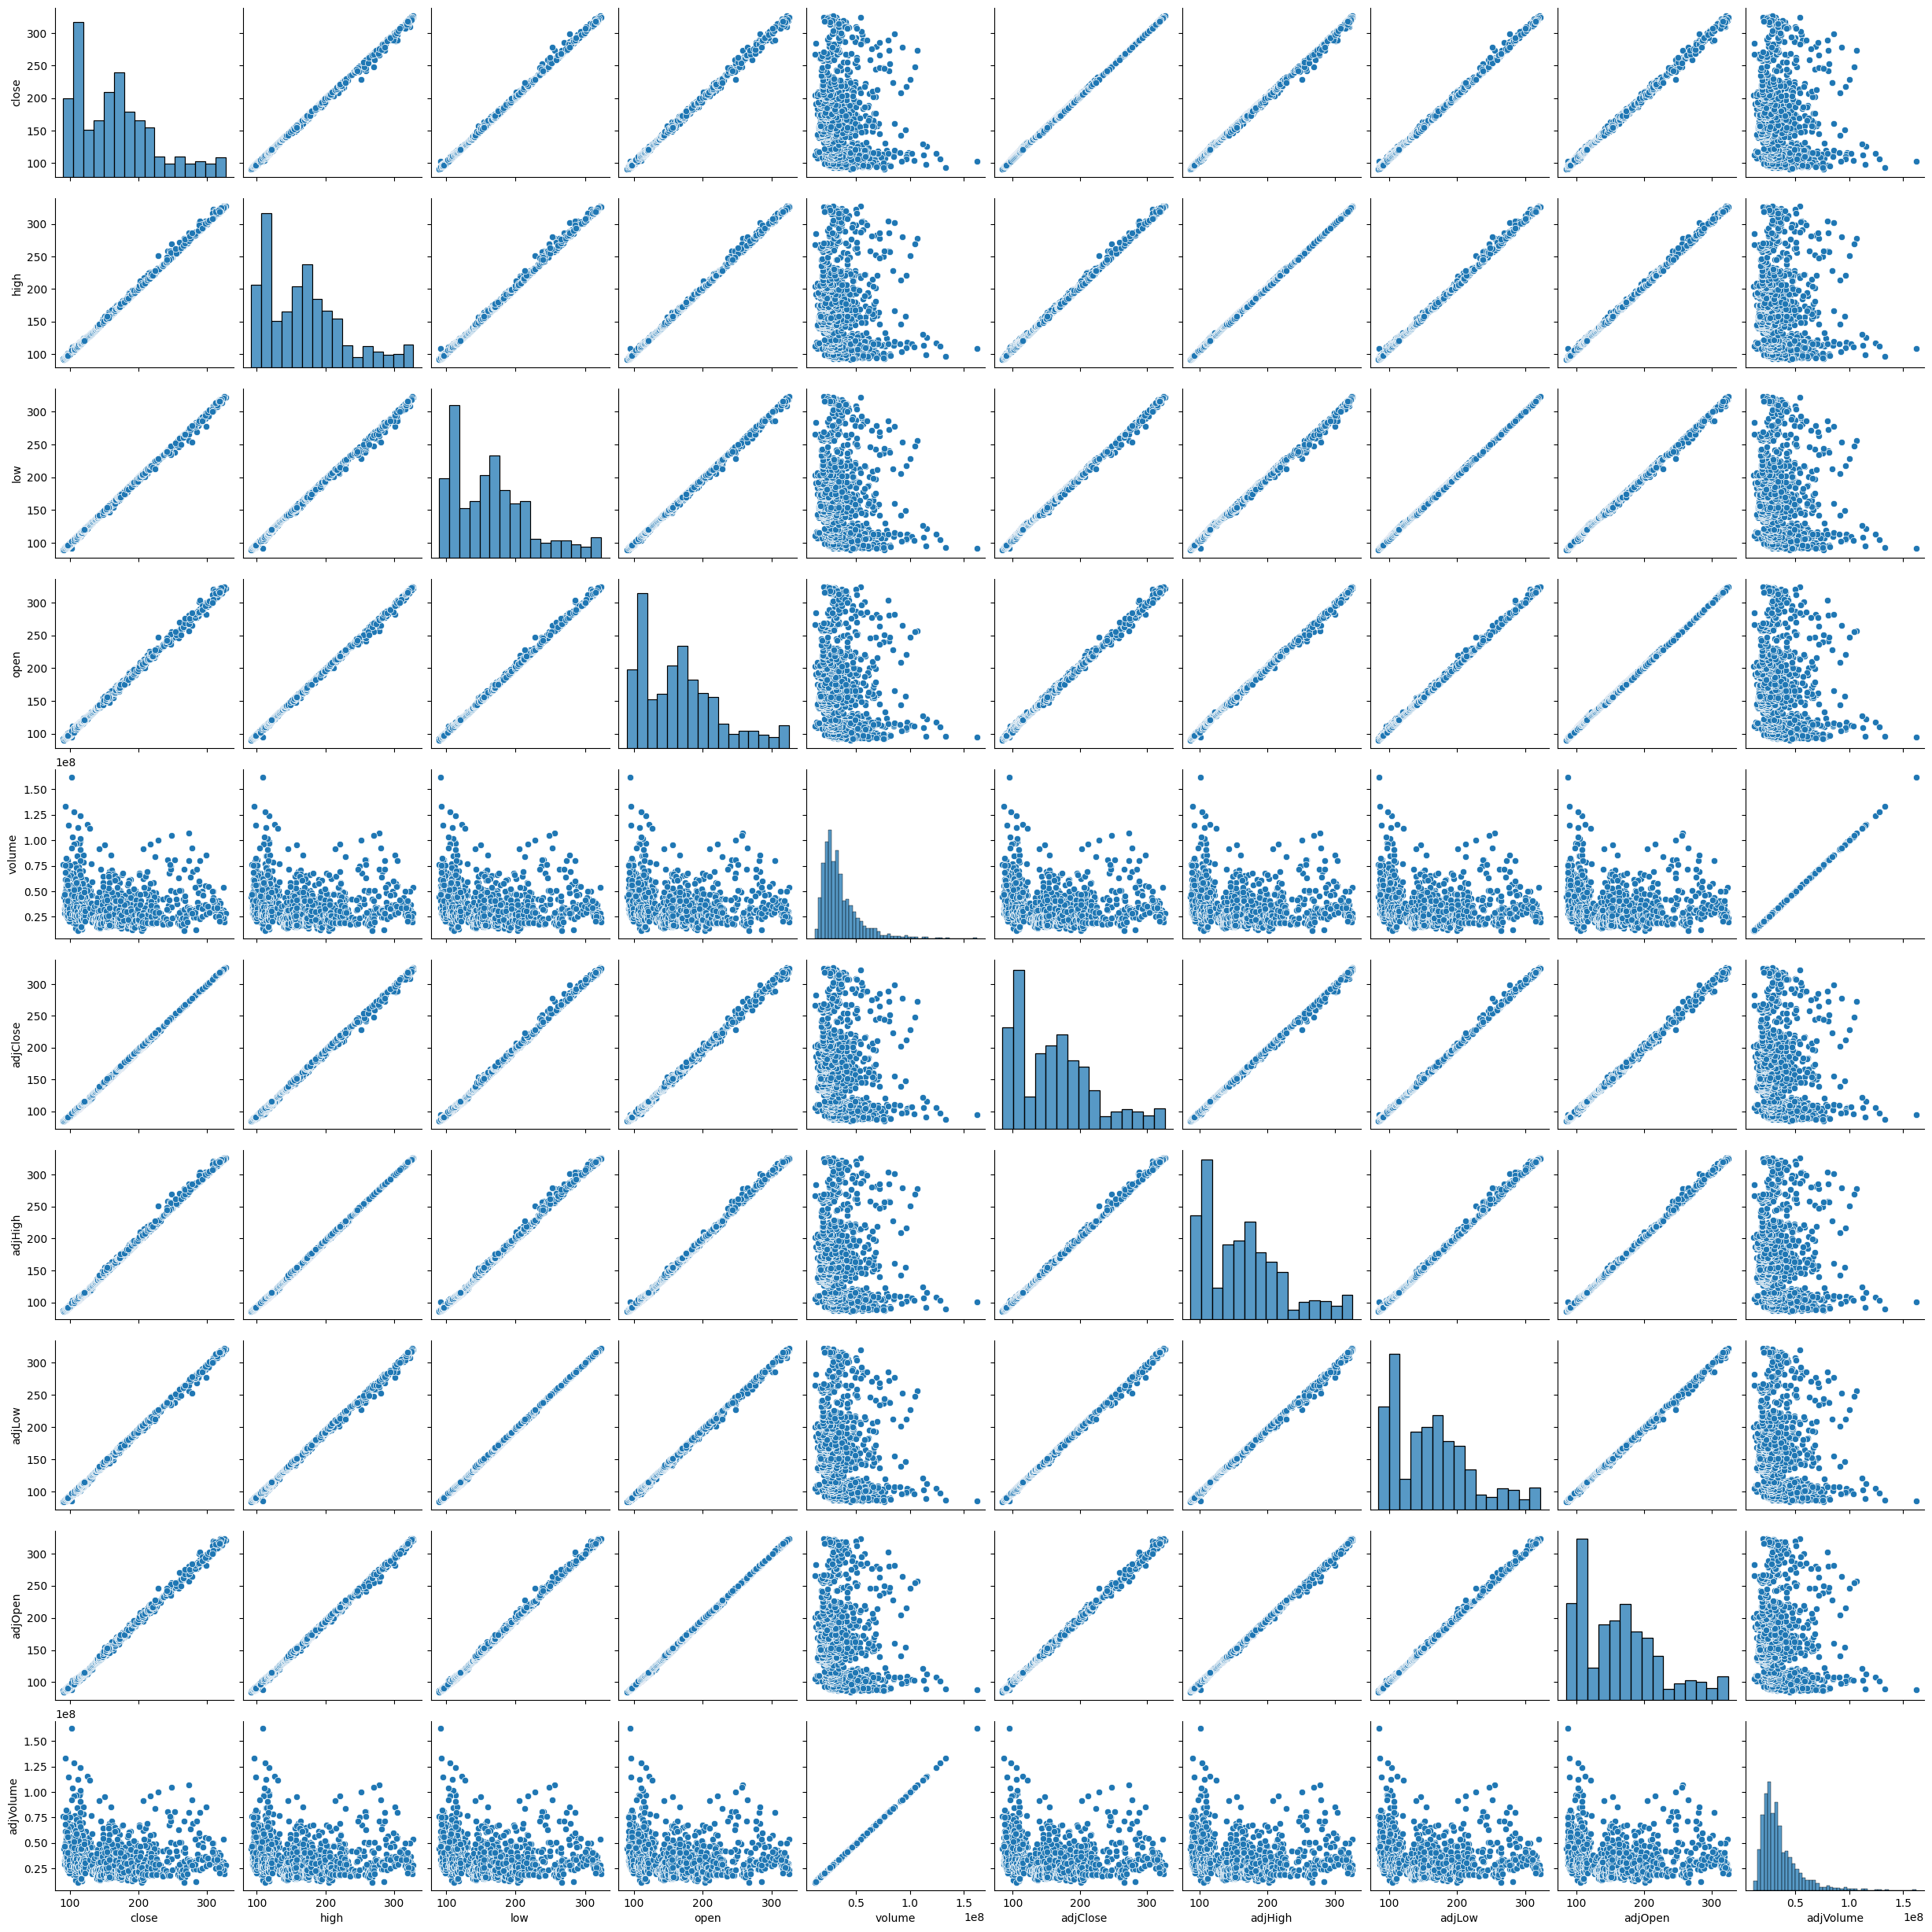

In [17]:
sns.pairplot(df_not_date)

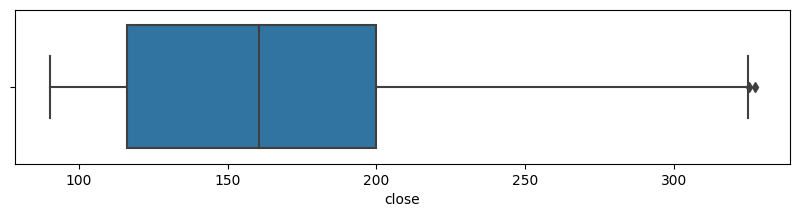

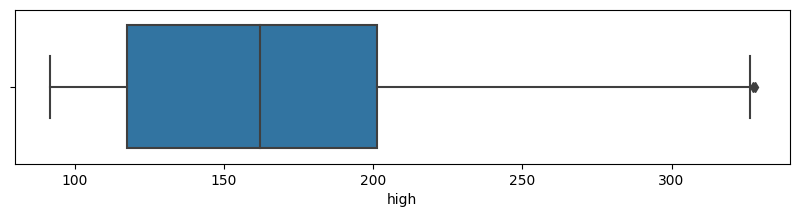

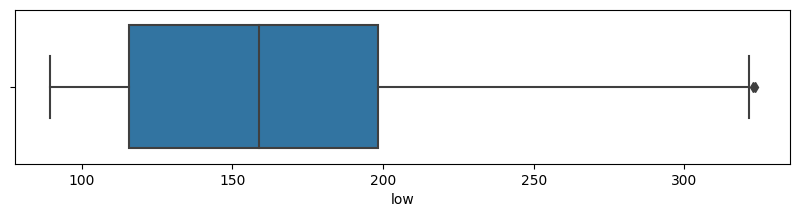

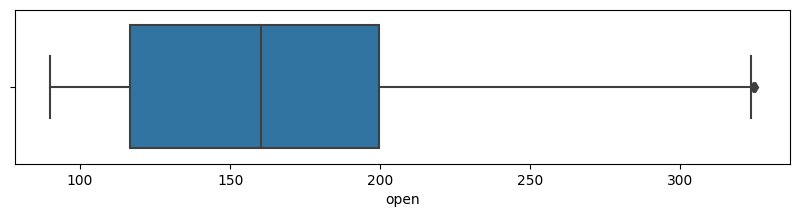

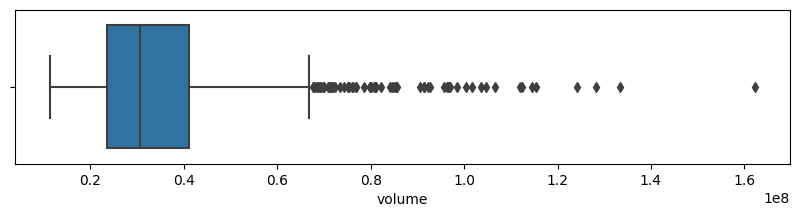

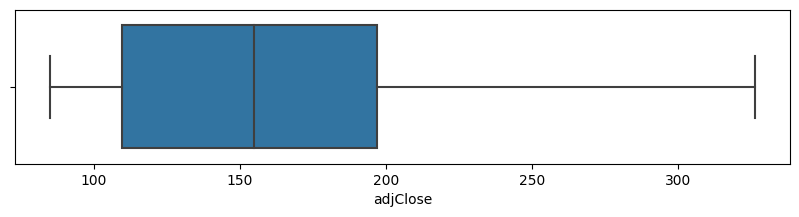

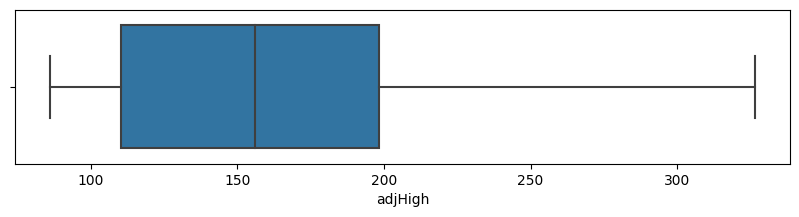

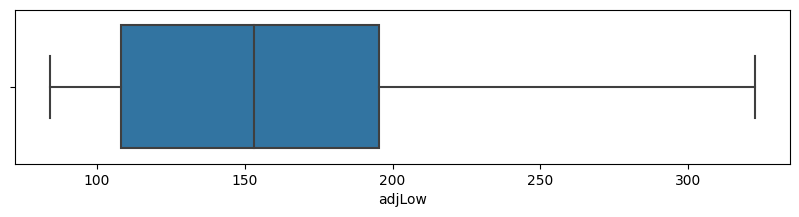

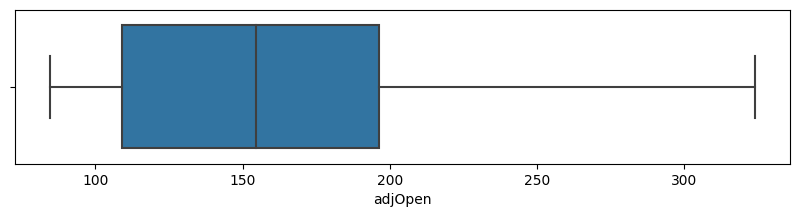

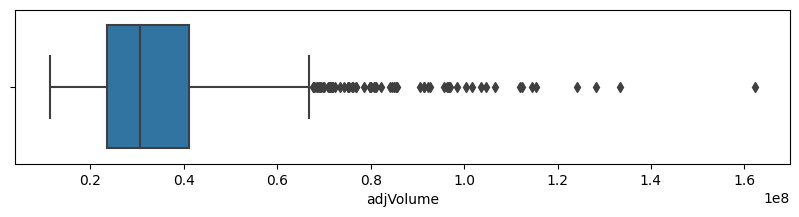

In [18]:
# Aykırı değerlerin grafik olarak görselleştirilmesi
for i in df_not_date.columns:
    plt.figure(figsize = (10,2))
    sns.boxplot(x = df[i])
    plt.show()

In [19]:
# Aykırı değer fonkisyonlarım
def outlier_thresholds(dataframe, col_name, q1 = 0.05, q3 = 0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):
        return True
    else:
        return False

In [20]:
# Kolonlar arasındaki aykırı değerlere bakıyorum.
for i in df_not_date.columns:
    check_value = check_outlier(df_not_date, i)
    print(f"{i} kolonun aykırı değer durumu: {check_value}")

close kolonun aykırı değer durumu: False
high kolonun aykırı değer durumu: False
low kolonun aykırı değer durumu: False
open kolonun aykırı değer durumu: False
volume kolonun aykırı değer durumu: True
adjClose kolonun aykırı değer durumu: False
adjHigh kolonun aykırı değer durumu: False
adjLow kolonun aykırı değer durumu: False
adjOpen kolonun aykırı değer durumu: False
adjVolume kolonun aykırı değer durumu: True


In [21]:
# Aykırı değerlleri değiştireceğim fonksiyonum
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

In [22]:
# Aykırı değer aralıklarını değiştirdiğim kısım!
for i in df_not_date.columns:
    check_value = check_outlier(df_not_date, i)
    if check_value:
        replace_with_thresholds(df_not_date, i)

In [23]:
# Kolonlar arasındaki aykırı değerlere bakıyorum.
for i in df_not_date.columns:
    check_value = check_outlier(df_not_date, i)
    print(f"{i} kolonun aykırı değer durumu: {check_value}")

close kolonun aykırı değer durumu: False
high kolonun aykırı değer durumu: False
low kolonun aykırı değer durumu: False
open kolonun aykırı değer durumu: False
volume kolonun aykırı değer durumu: False
adjClose kolonun aykırı değer durumu: False
adjHigh kolonun aykırı değer durumu: False
adjLow kolonun aykırı değer durumu: False
adjOpen kolonun aykırı değer durumu: False
adjVolume kolonun aykırı değer durumu: False


In [24]:
mms = MinMaxScaler()
mms_df = mms.fit_transform(df_not_date)

In [25]:
df_mms = pd.DataFrame(data = mms_df, columns = df_not_date.columns)
df_mms.head()

close      high       low      open    volume  adjClose   adjHigh  \
0  0.176074  0.171860  0.173508  0.171857  0.259684  0.152158  0.148554   
1  0.174956  0.170548  0.177997  0.178333  0.145931  0.151146  0.147365   
2  0.168623  0.168431  0.172866  0.175649  0.297737  0.145419  0.145446   
3  0.169699  0.168177  0.173508  0.175521  0.156323  0.146393  0.145216   
4  0.167272  0.165065  0.170387  0.169812  0.168036  0.144198  0.142396   

     adjLow   adjOpen  adjVolume  
0  0.149806  0.148290   0.259684  
1  0.153865  0.154145   0.145931  
2  0.149226  0.151718   0.297737  
3  0.149806  0.151603   0.156323  
4  0.146984  0.146441   0.168036

In [26]:
X = df_mms.drop(["close"], axis = 1)
y = df_mms["close"]

In [27]:
X_train = X[:943]
X_test = X[943:]
Y_train = y[:943]
Y_test = y[943:]

In [28]:
X_train.head()

high       low      open    volume  adjClose   adjHigh    adjLow  \
0  0.171860  0.173508  0.171857  0.259684  0.152158  0.148554  0.149806   
1  0.170548  0.177997  0.178333  0.145931  0.151146  0.147365  0.153865   
2  0.168431  0.172866  0.175649  0.297737  0.145419  0.145446  0.149226   
3  0.168177  0.173508  0.175521  0.156323  0.146393  0.145216  0.149806   
4  0.165065  0.170387  0.169812  0.168036  0.144198  0.142396  0.146984   

    adjOpen  adjVolume  
0  0.148290   0.259684  
1  0.154145   0.145931  
2  0.151718   0.297737  
3  0.151603   0.156323  
4  0.146441   0.168036

In [29]:
Y_train.head()

0    0.176074
1    0.174956
2    0.168623
3    0.169699
4    0.167272
Name: close, dtype: float64

In [30]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (943, 9)
X_test shape:  (315, 9)
Y_train shape:  (943,)
Y_test shape:  (315,)


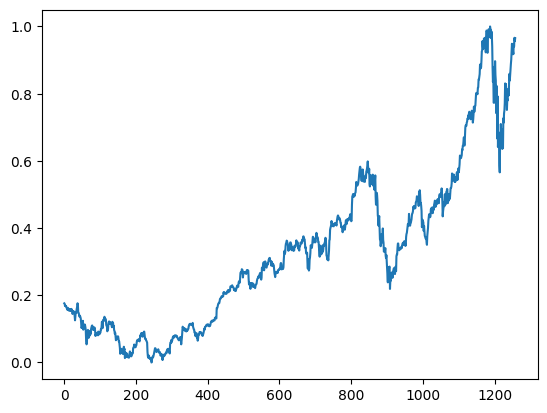

In [31]:
# Bağımlı değişkenimizin tüm hali
plt.plot(df_mms["close"])
plt.show()

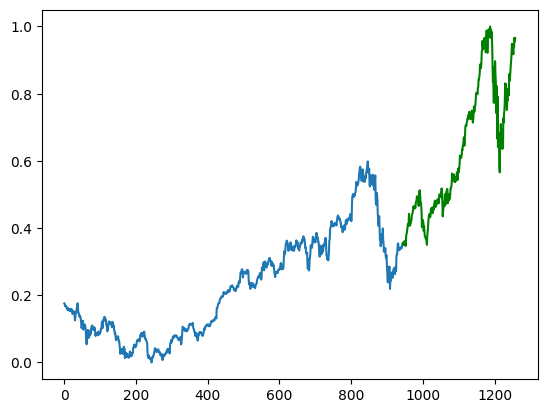

In [32]:
# Bağımlı değişkenimizin Y_train ve Y_test olarak ayrılmı hali
plt.plot(df_mms["close"][:943])
plt.plot(df_mms["close"][943:], color = "green")
plt.show()

In [33]:
RanForReg_model = RandomForestRegressor()

"""
# Bu parametreler ile Skorumuz:  0.8651725640352754
parameters_rfr = {
    'n_estimators': [100, 200, 300, 500],  # Ağaç sayısı
    'max_depth': [None, 5, 10, 20],  # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10, 15],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['auto', 'sqrt', 'log2']  # Özelliklerin seçiminde kullanılacak strateji
}
"""

# Bu parametreler ile skorumuz: 0.8660908923478665
parameters_rfr = {
    'n_estimators': [100, 200, 300, 400],  # Ağaç sayısı
    'max_depth': [None, 10, 15, 20],  # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['auto', 'sqrt']  # Özelliklerin seçiminde kullanılacak strateji
}


gsc = GridSearchCV(estimator = RanForReg_model, param_grid = parameters_rfr, scoring='r2', cv=5)
gsc_search = gsc.fit(X_train, Y_train)
y_pred_gsc = gsc.predict(X_test)

best_parm_gsc_rfr = gsc_search.best_params_
best_score_gsc_rfr = gsc_search.best_score_

print("GridSearch ile Random Forest Regression modelinin en iyi parametırları: ", best_parm_gsc_rfr)
print("GridSearch ile Random Forest Regression modelinin en iyi skoru: ",best_score_gsc_rfr)

GridSearch ile Random Forest Regression modelinin en iyi parametırları:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
GridSearch ile Random Forest Regression modelinin en iyi skoru:  0.8645605876214827


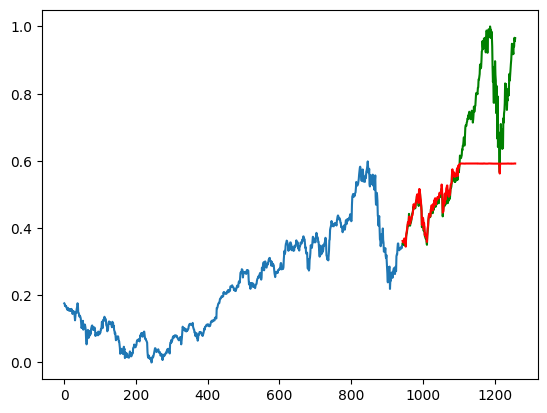

In [34]:
best_model_rfr = RandomForestRegressor(**best_parm_gsc_rfr)
best_model_rfr.fit(X_train, Y_train)

predictions_rfr = best_model_rfr.predict(X_test)

plt.plot(df_mms["close"][:943])
plt.plot(df_mms["close"][943:], color = "green")
plt.plot(range(943,len(X)), predictions_rfr, color = "red")
plt.show()

In [35]:
dtr_model = DecisionTreeRegressor()

parameters_dtr = {
    'max_depth': [10, 15, 20],  # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['log2', 'sqrt', None],  # Özelliklerin seçiminde kullanılacak strateji
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson']  # Bölme kriteri
}

gsc_dtr = GridSearchCV(estimator = dtr_model, param_grid = parameters_dtr, scoring='r2', cv=5)
gsc_search_dtr = gsc_dtr.fit(X_train, Y_train)
y_pred_gsc_dtr = gsc_dtr.predict(X_test)

best_parm_gsc_dtr = gsc_search_dtr.best_params_
best_score_gsc_dtr = gsc_search_dtr.best_score_

print("GridSearch ile Decision Tree Regression modelinin en iyi parametırları: ", best_parm_gsc_dtr)
print("GridSearch ile Decision Tree Regression modelinin en iyi skoru: ",best_score_gsc_dtr)

GridSearch ile Decision Tree Regression modelinin en iyi parametırları:  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearch ile Decision Tree Regression modelinin en iyi skoru:  0.8649493987917


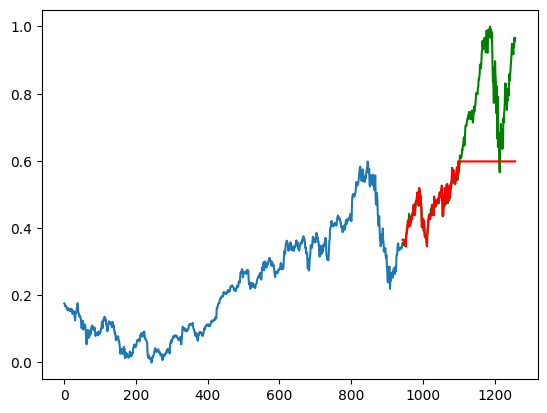

In [36]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_dtr = DecisionTreeRegressor(**best_parm_gsc_dtr)
best_model_dtr.fit(X_train, Y_train)

# Tahmin yapma
predictions_dtr = best_model_dtr.predict(X_test)

plt.plot(df_mms["close"][:943])
plt.plot(df_mms["close"][943:], color = "green")
plt.plot(range(943,len(X)), predictions_dtr, color = "red")
plt.show()

In [37]:
xgb_model = xgb.XGBRegressor()


"""
# Bu parametreler ile sonucum: 0.8675297699269745
parameters_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [7, 9, 11],  # Ağacın maksimum derinliği
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'subsample': [0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.8, 1.0]  # Özellik örnekleme oranı
}
"""
# Bu parametreler ile sonucum: 0.8675297699269745
parameters_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [7, 9, 11],  # Ağacın maksimum derinliği
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'subsample': [0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.8, 1.0],  # Özellik örnekleme oranı
    'gamma': [0, 0.1, 0.3]  # Kesme parametresi
}

gsc_xgb = GridSearchCV(estimator = xgb_model, param_grid = parameters_xgb, scoring='r2', cv=5)
gsc_search_xgb = gsc_xgb.fit(X_train, Y_train)
y_pred_gsc_xgb = gsc_xgb.predict(X_test)

best_parm_gsc_xgb = gsc_search_xgb.best_params_
best_score_gsc_xgb = gsc_search_xgb.best_score_

print("GridSearch ile XGBoost modelinin en iyi parametırları: ", best_parm_gsc_xgb)
print("GridSearch ile XGBoost modelinin en iyi skoru: ",best_score_gsc_xgb)

GridSearch ile XGBoost modelinin en iyi parametırları:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
GridSearch ile XGBoost modelinin en iyi skoru:  0.8555569130236707


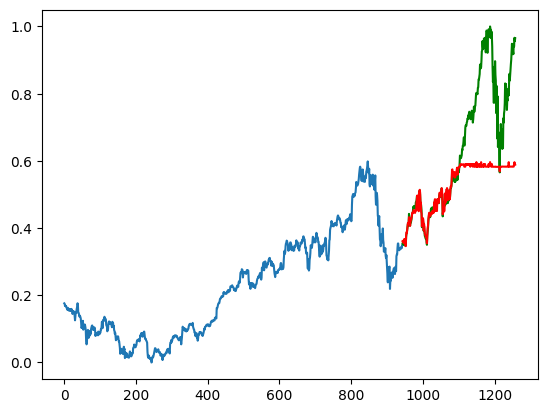

In [38]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_xgb = xgb.XGBRegressor(**best_parm_gsc_xgb)
best_model_xgb.fit(X_train, Y_train)

# Tahmin yapma
predictions_xgb = best_model_xgb.predict(X_test)

plt.plot(df_mms["close"][:943])
plt.plot(df_mms["close"][943:], color = "green")
plt.plot(range(943,len(X)), predictions_xgb, color = "red")
plt.show()

In [39]:
lgb_model = lgb.LGBMRegressor()

"""
# Bu parametreler ile skorum: 0.8265849399340167
parameters_lgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [3, 5, 7],  # Ağacın maksimum derinliği
    'num_leaves': [10, 20, 30],  # Yaprak sayısı
    'subsample': [0.6, 0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.6, 0.8, 1.0],  # Özellik örnekleme oranı
    'reg_alpha': [0, 0.1, 0.5],  # L1 düzenlileştirme parametresi
    'reg_lambda': [0, 0.1, 0.5]  # L2 düzenlileştirme parametresi
}
"""
# Bu parametreler ile skorum: 0.8265849399340167
parameters_lgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [3, 5, 7],  # Ağacın maksimum derinliği
    'num_leaves': [10, 20, 30],  # Yaprak sayısı
    'subsample': [0.6, 0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.6, 0.8, 1.0],  # Özellik örnekleme oranı
    'reg_alpha': [0, 0.1, 0.5],  # L1 düzenlileştirme parametresi
    'reg_lambda': [0, 0.1, 0.5],  # L2 düzenlileştirme parametresi
    'min_child_samples': [20, 50, 100]  # Minimum çocuk örnek sayısı
}

gsc_lgb = GridSearchCV(estimator = lgb_model, param_grid = parameters_lgb, scoring = "r2", cv = 5)
gsc_search_lgb = gsc_lgb.fit(X_train, Y_train)
y_pred_gsc_lgb = gsc_lgb.predict(X_test)

best_parm_gsc_lgb = gsc_search_lgb.best_params_
best_score_gsc_lgb = gsc_search_lgb.best_score_

print("GridSearch ile LightGBM modelinin en iyi parametırları: ", best_parm_gsc_lgb)
print("GridSearch ile LightGBM modelinin en iyi skoru: ",best_score_gsc_lgb)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 943, number of used features: 9
[LightGBM] [Info] Start training from score 0.224940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

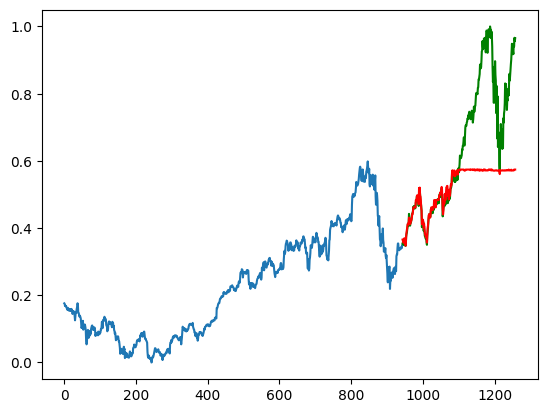

In [40]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_lgb = lgb.LGBMRegressor(**best_parm_gsc_lgb)
best_model_lgb.fit(X_train, Y_train)

# Tahmin yapma
predictions_lgb = best_model_lgb.predict(X_test)

plt.plot(df_mms["close"][:943])
plt.plot(df_mms["close"][943:], color = "green")
plt.plot(range(943,len(X)), predictions_lgb, color = "red")
plt.show()

In [41]:
# date değeri olmadan ayrı bir veri seti oluyoruz!
# İkinci aşamada kullancağım veri setinin ilk hali!
df_not_date = df.drop(["date"], axis=1)
df_not_date.head()

close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23  50884452  120.056069  121.134251   
3  130.535  131.390  130.05  131.20  32112797  120.291057  121.078960   
4  129.960  130.655  129.32  129.86  33667627  119.761181  120.401640   

       adjLow     adjOpen  adjVolume  
0  119.844118  120.111360   45833246  
1  120.811718  121.512076   30733309  
2  119.705890  120.931516   50884452  
3  119.844118  120.903870   32112797  
4  119.171406  119.669029   33667627

In [42]:
X = df_not_date.drop(["close"], axis = 1)
y = df_not_date["close"]

In [43]:
# Bu aşamada da veri setinin %75 Train %25 Test olarak alacağım
X_train = X[:943]
X_test = X[943:]
Y_train = y[:943]
Y_test = y[943:]

In [44]:
X_train.head()

high     low    open    volume    adjClose     adjHigh      adjLow  \
0  132.260  130.05  130.34  45833246  121.682558  121.880685  119.844118   
1  131.950  131.10  131.86  30733309  121.438354  121.595013  120.811718   
2  131.450  129.90  131.23  50884452  120.056069  121.134251  119.705890   
3  131.390  130.05  131.20  32112797  120.291057  121.078960  119.844118   
4  130.655  129.32  129.86  33667627  119.761181  120.401640  119.171406   

      adjOpen  adjVolume  
0  120.111360   45833246  
1  121.512076   30733309  
2  120.931516   50884452  
3  120.903870   32112797  
4  119.669029   33667627

In [45]:
Y_train.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [46]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (943, 9)
X_test shape:  (315, 9)
Y_train shape:  (943,)
Y_test shape:  (315,)


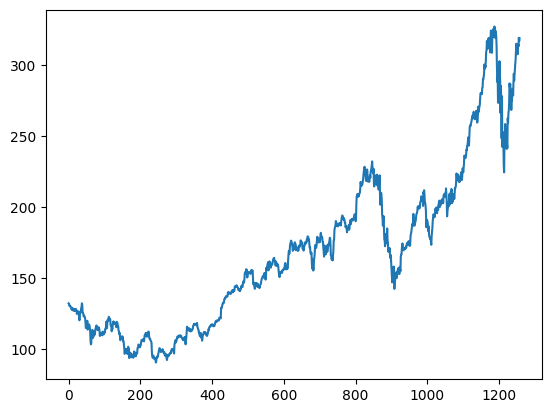

In [47]:
# Bağımlı değişkenimizin tüm hali
plt.plot(df_not_date["close"])
plt.show()

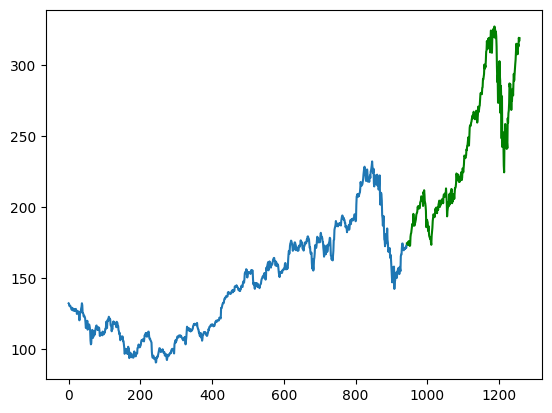

In [48]:
# Bağımlı değişkenimizin Y_train ve Y_test olarak ayrılmı hali
plt.plot(df_not_date["close"][:943])
plt.plot(df_not_date["close"][943:], color = "green")
plt.show()

In [49]:
RanForReg_model = RandomForestRegressor()

parameters_rfr = {
    'n_estimators': [100, 200, 300, 400],  # Ağaç sayısı
    'max_depth': [None, 10, 15, 20],  # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['auto', 'sqrt']  # Özelliklerin seçiminde kullanılacak strateji
}


gsc = GridSearchCV(estimator = RanForReg_model, param_grid = parameters_rfr, scoring='r2', cv=5)
gsc_search = gsc.fit(X_train, Y_train)
y_pred_gsc = gsc.predict(X_test)

best_parm_gsc_rfr = gsc_search.best_params_
best_score_gsc_rfr = gsc_search.best_score_

print("GridSearch ile Random Forest Regression modelinin en iyi parametırları: ", best_parm_gsc_rfr)
print("GridSearch ile Random Forest Regression modelinin en iyi skoru: ",best_score_gsc_rfr)

GridSearch ile Random Forest Regression modelinin en iyi parametırları:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
GridSearch ile Random Forest Regression modelinin en iyi skoru:  0.86526640238256


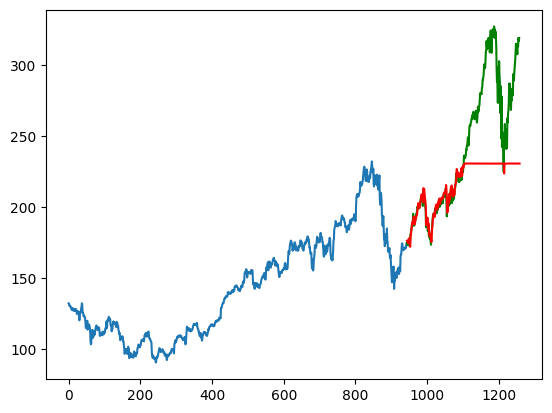

In [50]:
best_model_rfr = RandomForestRegressor(**best_parm_gsc_rfr)
best_model_rfr.fit(X_train, Y_train)

predictions_rfr = best_model_rfr.predict(X_test)

plt.plot(df_not_date["close"][:943])
plt.plot(df_not_date["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_rfr, color = "red")
plt.show()

In [51]:
dtr_model = DecisionTreeRegressor()

parameters_dtr = {
    'max_depth': [10, 15, 20],  # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['log2', 'sqrt', None],  # Özelliklerin seçiminde kullanılacak strateji
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson']  # Bölme kriteri
}

gsc_dtr = GridSearchCV(estimator = dtr_model, param_grid = parameters_dtr, scoring='r2', cv=5)
gsc_search_dtr = gsc_dtr.fit(X_train, Y_train)
y_pred_gsc_dtr = gsc_dtr.predict(X_test)

best_parm_gsc_dtr = gsc_search_dtr.best_params_
best_score_gsc_dtr = gsc_search_dtr.best_score_

print("GridSearch ile Decision Tree Regression modelinin en iyi parametırları: ", best_parm_gsc_dtr)
print("GridSearch ile Decision Tree Regression modelinin en iyi skoru: ",best_score_gsc_dtr)

GridSearch ile Decision Tree Regression modelinin en iyi parametırları:  {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearch ile Decision Tree Regression modelinin en iyi skoru:  0.865511194684468


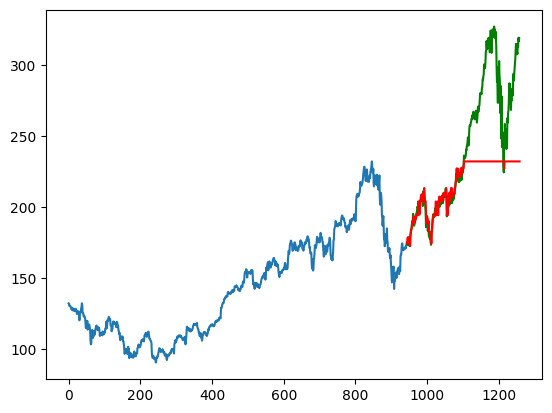

In [52]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_dtr = DecisionTreeRegressor(**best_parm_gsc_dtr)
best_model_dtr.fit(X_train, Y_train)

# Tahmin yapma
predictions_dtr = best_model_dtr.predict(X_test)

plt.plot(df_not_date["close"][:943])
plt.plot(df_not_date["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_dtr, color = "red")
plt.show()

In [53]:
xgb_model = xgb.XGBRegressor()

parameters_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [7, 9, 11],  # Ağacın maksimum derinliği
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'subsample': [0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.8, 1.0],  # Özellik örnekleme oranı
    'gamma': [0, 0.1, 0.3]  # Kesme parametresi
}

gsc_xgb = GridSearchCV(estimator = xgb_model, param_grid = parameters_xgb, scoring='r2', cv=5)
gsc_search_xgb = gsc_xgb.fit(X_train, Y_train)
y_pred_gsc_xgb = gsc_xgb.predict(X_test)

best_parm_gsc_xgb = gsc_search_xgb.best_params_
best_score_gsc_xgb = gsc_search_xgb.best_score_

print("GridSearch ile XGBoost modelinin en iyi parametırları: ", best_parm_gsc_xgb)
print("GridSearch ile XGBoost modelinin en iyi skoru: ",best_score_gsc_xgb)

GridSearch ile XGBoost modelinin en iyi parametırları:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 200, 'subsample': 0.8}
GridSearch ile XGBoost modelinin en iyi skoru:  0.855846632127872


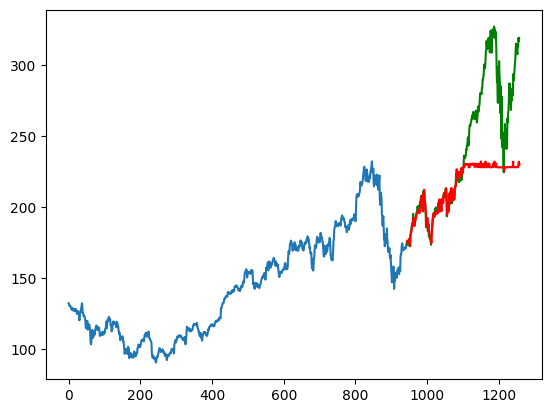

In [54]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_xgb = xgb.XGBRegressor(**best_parm_gsc_xgb)
best_model_xgb.fit(X_train, Y_train)

# Tahmin yapma
predictions_xgb = best_model_xgb.predict(X_test)

plt.plot(df_not_date["close"][:943])
plt.plot(df_not_date["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_xgb, color = "red")
plt.show()

In [55]:
lgb_model = lgb.LGBMRegressor()

parameters_lgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [3, 5, 7],  # Ağacın maksimum derinliği
    'num_leaves': [10, 20, 30],  # Yaprak sayısı
    'subsample': [0.6, 0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.6, 0.8, 1.0],  # Özellik örnekleme oranı
    'reg_alpha': [0, 0.1, 0.5],  # L1 düzenlileştirme parametresi
    'reg_lambda': [0, 0.1, 0.5],  # L2 düzenlileştirme parametresi
    'min_child_samples': [20, 50, 100]  # Minimum çocuk örnek sayısı
}

gsc_lgb = GridSearchCV(estimator = lgb_model, param_grid = parameters_lgb, scoring = "r2", cv = 5)
gsc_search_lgb = gsc_lgb.fit(X_train, Y_train)
y_pred_gsc_lgb = gsc_lgb.predict(X_test)

best_parm_gsc_lgb = gsc_search_lgb.best_params_
best_score_gsc_lgb = gsc_search_lgb.best_score_

print("GridSearch ile LightGBM modelinin en iyi parametırları: ", best_parm_gsc_lgb)
print("GridSearch ile LightGBM modelinin en iyi skoru: ",best_score_gsc_lgb)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 943, number of used features: 9
[LightGBM] [Info] Start training from score 143.619401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

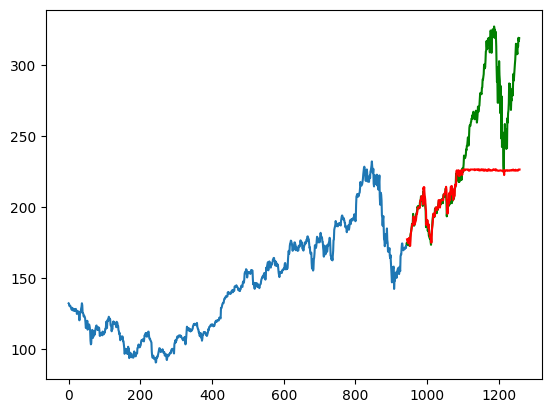

In [56]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_lgb = lgb.LGBMRegressor(**best_parm_gsc_lgb)
best_model_lgb.fit(X_train, Y_train)

# Tahmin yapma
predictions_lgb = best_model_lgb.predict(X_test)

plt.plot(df_not_date["close"][:943])
plt.plot(df_not_date["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_lgb, color = "red")
plt.show()

In [57]:
# date değeri olmadan ayrı bir veri seti oluyoruz!
# İkinci aşamada kullancağım veri setinin ilk hali!
df_not_date = df.drop(["date"], axis=1)
df_not_date.head()

close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23  50884452  120.056069  121.134251   
3  130.535  131.390  130.05  131.20  32112797  120.291057  121.078960   
4  129.960  130.655  129.32  129.86  33667627  119.761181  120.401640   

       adjLow     adjOpen  adjVolume  
0  119.844118  120.111360   45833246  
1  120.811718  121.512076   30733309  
2  119.705890  120.931516   50884452  
3  119.844118  120.903870   32112797  
4  119.171406  119.669029   33667627

In [58]:
ss = StandardScaler()
df_ss = ss.fit_transform(df_not_date)

In [59]:
df_ss = pd.DataFrame(data = df_ss, columns = df_not_date.columns)

In [60]:
df_ss.head()

close      high       low      open    volume  adjClose   adjHigh  \
0 -0.627840 -0.643219 -0.642852 -0.657504  0.626545 -0.698072 -0.711534   
1 -0.632503 -0.648612 -0.624097 -0.630644 -0.247086 -0.702232 -0.716345   
2 -0.658898 -0.657312 -0.645532 -0.641777  0.918790 -0.725776 -0.724105   
3 -0.654411 -0.658355 -0.642852 -0.642307 -0.167273 -0.721773 -0.725036   
4 -0.664529 -0.671143 -0.655892 -0.665986 -0.077316 -0.730799 -0.736443   

     adjLow   adjOpen  adjVolume  
0 -0.711955 -0.724829   0.626545  
1 -0.695227 -0.700874  -0.247086  
2 -0.714344 -0.710803   0.918790  
3 -0.711955 -0.711276  -0.167273  
4 -0.723584 -0.732394  -0.077316

In [61]:
X = df_ss.drop(["close"], axis = 1)
y = df_ss["close"]

In [62]:
# Bu aşamada da veri setinin %75 Train %25 Test olarak alacağım
X_train = X[:943]
X_test = X[943:]
Y_train = y[:943]
Y_test = y[943:]

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (943, 9)
X_test shape:  (315, 9)
Y_train shape:  (943,)
Y_test shape:  (315,)


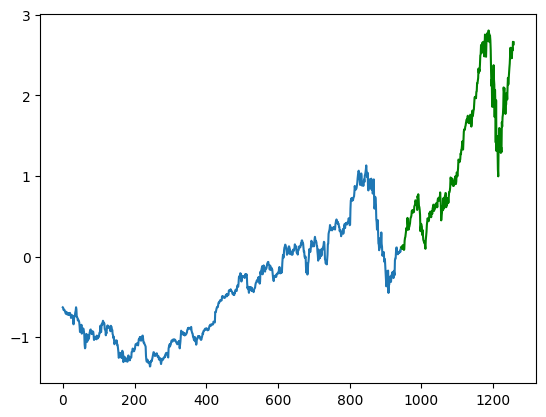

In [63]:
# Bağımlı değişkenimizin Y_train ve Y_test olarak ayrılmı hali
plt.plot(df_ss["close"][:943])
plt.plot(df_ss["close"][943:], color = "green")
plt.show()

In [64]:
RanForReg_model = RandomForestRegressor()

parameters_rfr = {
    'n_estimators': [100, 200, 300, 400],  # Ağaç sayısı
    'max_depth': [None, 10, 15, 20],  # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['auto', 'sqrt']  # Özelliklerin seçiminde kullanılacak strateji
}


gsc = GridSearchCV(estimator = RanForReg_model, param_grid = parameters_rfr, scoring='r2', cv=5)
gsc_search = gsc.fit(X_train, Y_train)
y_pred_gsc = gsc.predict(X_test)

best_parm_gsc_rfr = gsc_search.best_params_
best_score_gsc_rfr = gsc_search.best_score_

print("GridSearch ile Random Forest Regression modelinin en iyi parametırları: ", best_parm_gsc_rfr)
print("GridSearch ile Random Forest Regression modelinin en iyi skoru: ",best_score_gsc_rfr)

GridSearch ile Random Forest Regression modelinin en iyi parametırları:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
GridSearch ile Random Forest Regression modelinin en iyi skoru:  0.8662809336470177


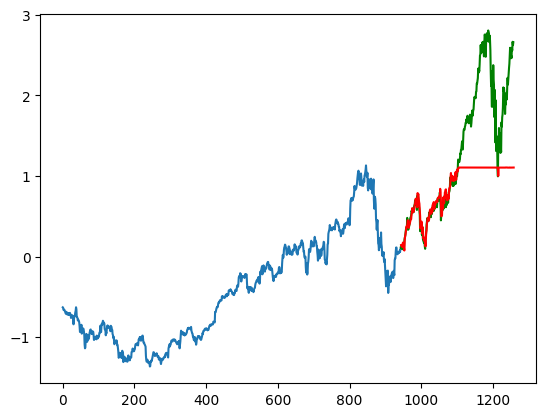

In [65]:
best_model_rfr = RandomForestRegressor(**best_parm_gsc_rfr)
best_model_rfr.fit(X_train, Y_train)

predictions_rfr = best_model_rfr.predict(X_test)

plt.plot(df_ss["close"][:943])
plt.plot(df_ss["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_rfr, color = "red")
plt.show()

In [66]:
dtr_model = DecisionTreeRegressor()

parameters_dtr = {
    'max_depth': [10, 15, 20],  # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümleri için minimum örnek sayısı
    'max_features': ['log2', 'sqrt', None],  # Özelliklerin seçiminde kullanılacak strateji
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson']  # Bölme kriteri
}

gsc_dtr = GridSearchCV(estimator = dtr_model, param_grid = parameters_dtr, scoring='r2', cv=5)
gsc_search_dtr = gsc_dtr.fit(X_train, Y_train)
y_pred_gsc_dtr = gsc_dtr.predict(X_test)

best_parm_gsc_dtr = gsc_search_dtr.best_params_
best_score_gsc_dtr = gsc_search_dtr.best_score_

print("GridSearch ile Decision Tree Regression modelinin en iyi parametırları: ", best_parm_gsc_dtr)
print("GridSearch ile Decision Tree Regression modelinin en iyi skoru: ",best_score_gsc_dtr)

GridSearch ile Decision Tree Regression modelinin en iyi parametırları:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearch ile Decision Tree Regression modelinin en iyi skoru:  0.8627132589007704


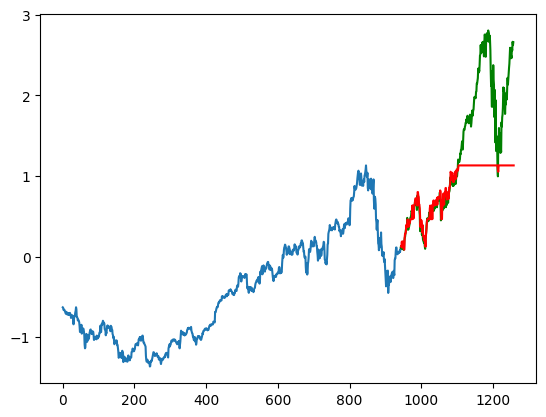

In [67]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_dtr = DecisionTreeRegressor(**best_parm_gsc_dtr)
best_model_dtr.fit(X_train, Y_train)

# Tahmin yapma
predictions_dtr = best_model_dtr.predict(X_test)

plt.plot(df_ss["close"][:943])
plt.plot(df_ss["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_dtr, color = "red")
plt.show()

In [68]:
xgb_model = xgb.XGBRegressor()

parameters_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [7, 9, 11],  # Ağacın maksimum derinliği
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'subsample': [0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.8, 1.0],  # Özellik örnekleme oranı
    'gamma': [0, 0.1, 0.3]  # Kesme parametresi
}

gsc_xgb = GridSearchCV(estimator = xgb_model, param_grid = parameters_xgb, scoring='r2', cv=5)
gsc_search_xgb = gsc_xgb.fit(X_train, Y_train)
y_pred_gsc_xgb = gsc_xgb.predict(X_test)

best_parm_gsc_xgb = gsc_search_xgb.best_params_
best_score_gsc_xgb = gsc_search_xgb.best_score_

print("GridSearch ile XGBoost modelinin en iyi parametırları: ", best_parm_gsc_xgb)
print("GridSearch ile XGBoost modelinin en iyi skoru: ",best_score_gsc_xgb)

GridSearch ile XGBoost modelinin en iyi parametırları:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
GridSearch ile XGBoost modelinin en iyi skoru:  0.8549467844693346


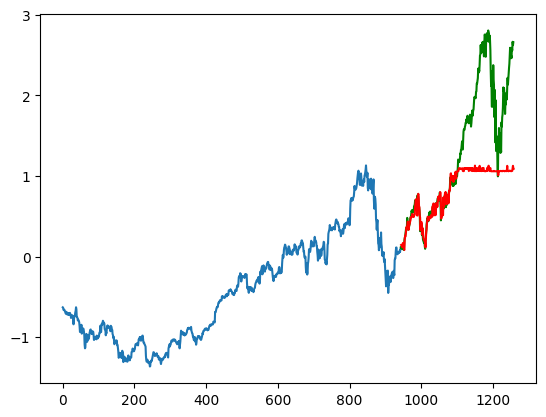

In [69]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_xgb = xgb.XGBRegressor(**best_parm_gsc_xgb)
best_model_xgb.fit(X_train, Y_train)

# Tahmin yapma
predictions_xgb = best_model_xgb.predict(X_test)

plt.plot(df_ss["close"][:943])
plt.plot(df_ss["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_xgb, color = "red")
plt.show()

In [70]:
lgb_model = lgb.LGBMRegressor()

parameters_lgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Öğrenme oranı
    'max_depth': [3, 5, 7],  # Ağacın maksimum derinliği
    'num_leaves': [10, 20, 30],  # Yaprak sayısı
    'subsample': [0.6, 0.8, 1.0],  # Alt örnekleme oranı
    'colsample_bytree': [0.6, 0.8, 1.0],  # Özellik örnekleme oranı
    'reg_alpha': [0, 0.1, 0.5],  # L1 düzenlileştirme parametresi
    'reg_lambda': [0, 0.1, 0.5],  # L2 düzenlileştirme parametresi
    'min_child_samples': [20, 50, 100]  # Minimum çocuk örnek sayısı
}

gsc_lgb = GridSearchCV(estimator = lgb_model, param_grid = parameters_lgb, scoring = "r2", cv = 5)
gsc_search_lgb = gsc_lgb.fit(X_train, Y_train)
y_pred_gsc_lgb = gsc_lgb.predict(X_test)

best_parm_gsc_lgb = gsc_search_lgb.best_params_
best_score_gsc_lgb = gsc_search_lgb.best_score_

print("GridSearch ile LightGBM modelinin en iyi parametırları: ", best_parm_gsc_lgb)
print("GridSearch ile LightGBM modelinin en iyi skoru: ",best_score_gsc_lgb)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 943, number of used features: 9
[LightGBM] [Info] Start training from score -0.424166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

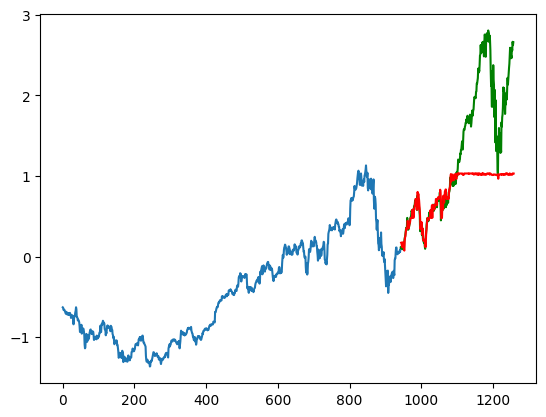

In [71]:
# En iyi parametrelerle modeli yeniden eğitme
best_model_lgb = lgb.LGBMRegressor(**best_parm_gsc_lgb)
best_model_lgb.fit(X_train, Y_train)

# Tahmin yapma
predictions_lgb = best_model_lgb.predict(X_test)

plt.plot(df_ss["close"][:943])
plt.plot(df_ss["close"][943:], color = "green")
plt.plot(range(944,len(X)+1), predictions_lgb, color = "red")
plt.show()

In [73]:
df_lstm = pd.read_csv("AAPL.csv")
df_lstm = df_lstm.drop(['symbol','Unnamed: 0','splitFactor','divCash'],axis=1)
df_lstm.head()

date    close     high     low    open    volume  \
0  2015-05-27 00:00:00+00:00  132.045  132.260  130.05  130.34  45833246   
1  2015-05-28 00:00:00+00:00  131.780  131.950  131.10  131.86  30733309   
2  2015-05-29 00:00:00+00:00  130.280  131.450  129.90  131.23  50884452   
3  2015-06-01 00:00:00+00:00  130.535  131.390  130.05  131.20  32112797   
4  2015-06-02 00:00:00+00:00  129.960  130.655  129.32  129.86  33667627   

     adjClose     adjHigh      adjLow     adjOpen  adjVolume  
0  121.682558  121.880685  119.844118  120.111360   45833246  
1  121.438354  121.595013  120.811718  121.512076   30733309  
2  120.056069  121.134251  119.705890  120.931516   50884452  
3  120.291057  121.078960  119.844118  120.903870   32112797  
4  119.761181  120.401640  119.171406  119.669029   33667627

In [74]:
df_lstm.date = pd.to_datetime(df_lstm.date)
df_lstm.date = df_lstm.date.dt.date
df_lstm_date = df_lstm.date

In [75]:
df_lstm_train = df_lstm.loc[0:1095,['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume']]
df_lstm_train['close'] = df_lstm_train['close'].astype('float64')
df_lstm_train.head()

close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23  50884452  120.056069  121.134251   
3  130.535  131.390  130.05  131.20  32112797  120.291057  121.078960   
4  129.960  130.655  129.32  129.86  33667627  119.761181  120.401640   

       adjLow     adjOpen  adjVolume  
0  119.844118  120.111360   45833246  
1  120.811718  121.512076   30733309  
2  119.705890  120.931516   50884452  
3  119.844118  120.903870   32112797  
4  119.171406  119.669029   33667627

In [76]:
df_lstm_test = df_lstm.loc[1095:,['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume']]
df_lstm_test['close'] = df_lstm_test['close'].astype('float64')
df_lstm_test.reset_index(inplace=True)
df_lstm_test.head()

index   close    high      low    open    volume    adjClose     adjHigh  \
0   1095  224.59  228.22  224.200  225.07  36187163  222.798811  226.399860   
1   1096  218.96  223.58  217.930  223.06  35767257  217.213712  221.796866   
2   1097  220.82  220.96  215.132  218.43  30352686  219.058878  219.197761   
3   1098  227.01  227.49  223.890  225.64  34755553  225.199510  225.675682   
4   1099  227.06  229.93  225.840  226.27  30889269  225.249112  228.096222   

       adjLow     adjOpen  adjVolume  
0  222.411921  223.274983   36187163  
1  216.191927  221.281013   35767257  
2  213.416242  216.687939   30352686  
3  222.104394  223.840437   34755553  
4  224.038842  224.465412   30889269

In [77]:
df_lstm_test = df_lstm_test.drop(['index'],axis=1)
df_lstm_test.head()

close    high      low    open    volume    adjClose     adjHigh  \
0  224.59  228.22  224.200  225.07  36187163  222.798811  226.399860   
1  218.96  223.58  217.930  223.06  35767257  217.213712  221.796866   
2  220.82  220.96  215.132  218.43  30352686  219.058878  219.197761   
3  227.01  227.49  223.890  225.64  34755553  225.199510  225.675682   
4  227.06  229.93  225.840  226.27  30889269  225.249112  228.096222   

       adjLow     adjOpen  adjVolume  
0  222.411921  223.274983   36187163  
1  216.191927  221.281013   35767257  
2  213.416242  216.687939   30352686  
3  222.104394  223.840437   34755553  
4  224.038842  224.465412   30889269

In [78]:
# Veri seti sıkıştırma işlemleri
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_lstm_train)
df_train_scaled.shape

scaler2 = StandardScaler()
df_train_scaled_target = scaler2.fit_transform(df_lstm_train[['close']])
df_train_scaled_target.shape

(1096, 1)

In [79]:
#Son 14 günün hisse senedi fiyatlarını kullanarak 1 gün önceden hisse senedi fiyatını tahmin etmek için veri oluşturma.
hops = 14
no_records = 1096
no_cols = 10
X_train=[]
y_train=[]
for i in range(hops,no_records):
    X_train.append(df_train_scaled[i-14:i])
    y_train.append(df_train_scaled_target[i][0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [80]:
print(X_train.shape)
print(y_train.shape)

(1082, 14, 10)
(1082,)


In [81]:
X_train_shape = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train_shape.shape

(1082, 14, 10)

Epoch 1/100
17/17 [==============================] - 8s 21ms/step - loss: 0.2305
Epoch 2/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0844
Epoch 3/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0632
Epoch 4/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0487
Epoch 5/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0443
Epoch 6/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0431
Epoch 7/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0401
Epoch 8/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0405
Epoch 9/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0360
Epoch 10/100
17/17 [==============================] - 0s 22ms/step - loss: 0.0361
Epoch 11/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0378
Epoch 12/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0376
Epoch 13/100
17/17 [=====

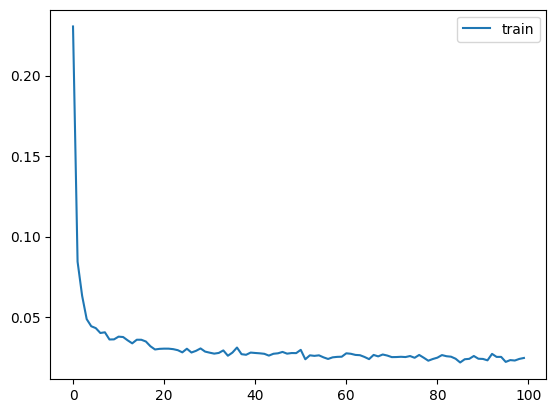

In [82]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(hops,no_cols)))
model.add(Dropout(0.4))
model.add(LSTM(units=50))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train_shape, y_train, epochs=100, batch_size=64)
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [83]:
df_train_last = df_lstm_train.iloc[-14:]
df_test_full = df_lstm_test
full_df = pd.concat((df_train_last,df_lstm_test),axis=0)
full_df.shape

(177, 10)

In [84]:
full_df = scaler.transform(full_df)
full_df.shape

(177, 10)

In [85]:
hops = 14
no_records = 177
no_cols = 10
X_train_pred=[]

for i in range(hops,no_records):
    X_train_pred.append(full_df[i-14:i])
X_train_pred = np.array(X_train_pred)
X_train_pred.shape

(163, 14, 10)

In [86]:
ytest = model.predict(X_train_pred)
yfinal_pred = scaler2.inverse_transform(ytest)

6/6 [==============================] - 2s 11ms/step


In [87]:
final_close_pred = pd.DataFrame(yfinal_pred)
final_close_pred.columns = ['final_close_pred']

In [88]:
full_final_test = pd.concat((final_close_pred,df_lstm_test),axis=1)
full_final_test = full_final_test[['open', 'final_close_pred', 'close', 'high', 'low', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume']]
full_final_test.head()

open  final_close_pred   close    high      low    volume    adjClose  \
0  225.07        222.131821  224.59  228.22  224.200  36187163  222.798811   
1  223.06        222.843399  218.96  223.58  217.930  35767257  217.213712   
2  218.43        221.112946  220.82  220.96  215.132  30352686  219.058878   
3  225.64        219.580368  227.01  227.49  223.890  34755553  225.199510   
4  226.27        221.611374  227.06  229.93  225.840  30889269  225.249112   

      adjHigh      adjLow     adjOpen  adjVolume  
0  226.399860  222.411921  223.274983   36187163  
1  221.796866  216.191927  221.281013   35767257  
2  219.197761  213.416242  216.687939   30352686  
3  225.675682  222.104394  223.840437   34755553  
4  228.096222  224.038842  224.465412   30889269

In [89]:
real_price = full_final_test['close']
predicted_price = full_final_test['final_close_pred']
rmse = math.sqrt(mean_squared_error(real_price, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 27.386


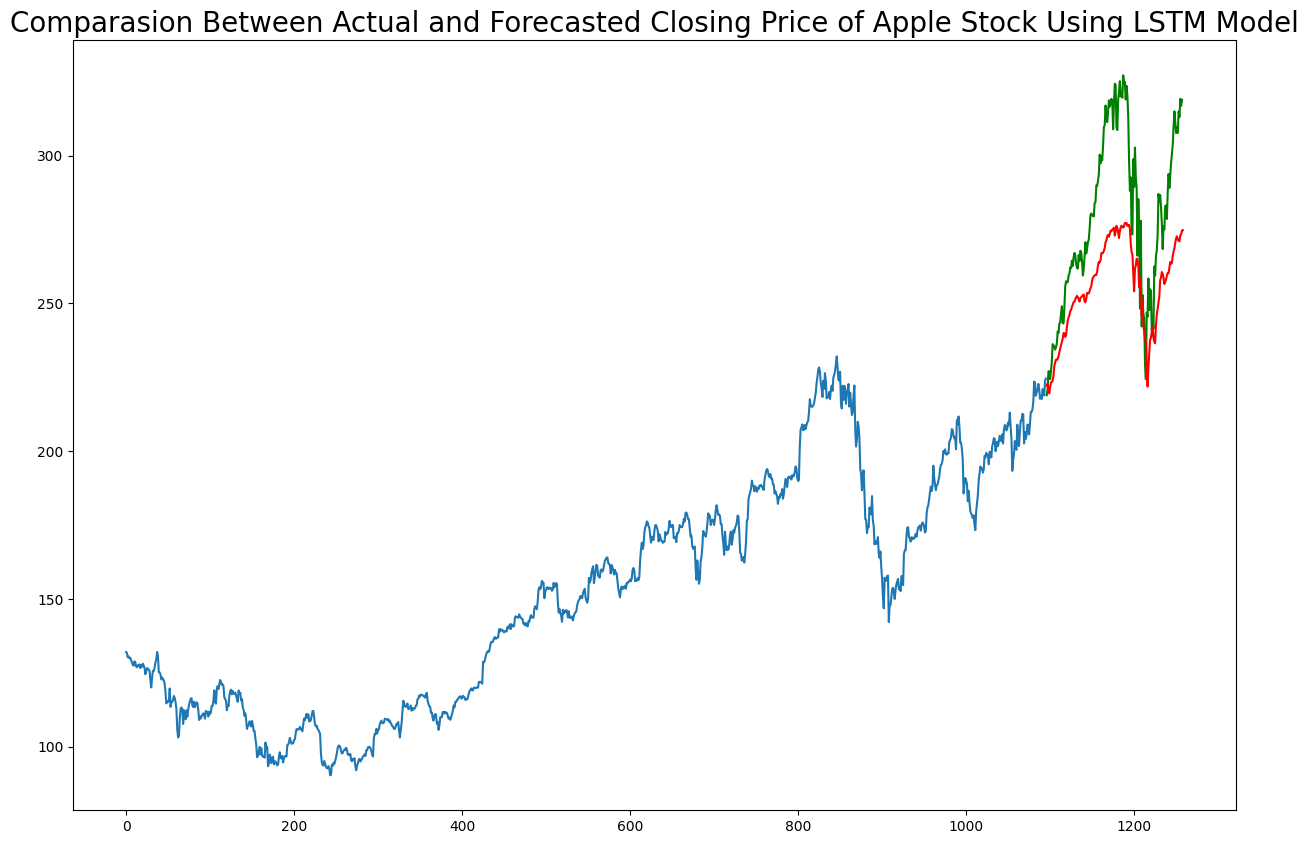

In [90]:
plt.figure(figsize=(15,10))
plt.plot(df_lstm["close"][:1096])
plt.plot(df_lstm["close"][1096:], color = "green")
plt.plot(range(1096,len(df_lstm)+1), full_final_test['final_close_pred'],label='forecast',color='red')
plt.title('Comparasion Between Actual and Forecasted Closing Price of Apple Stock Using LSTM Model',fontsize=20)
plt.show()

In [93]:
df1 = pd.read_csv("Company_Tweet.csv")
df2 = pd.read_csv("Tweet.csv")
df3 = pd.read_csv("Company.csv")

In [94]:
# Company_Tweet
df1.head()

tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL

In [95]:
# Company_Tweet Info
InfofData(df1)

############## Head ##############
             tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL


############## Tail ##############
             tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL


############## Info ##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB
None


############## Shape ##############
(4336445, 2)


############## Columns Name ##############
Index(['tweet_id', 'ticker_symbol'], dtype='object')


############## Describe ########

In [96]:
# Tweet
df2.head()

tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num  
0            0         1  
1            0         0  
2            0         0  
3            0         1  
4            0         1

In [97]:
# Tweet Info
InfofData(df2)

############## Head ##############
             tweet_id           writer   post_date  \
0  550441509175443456  VisualStockRSRC  1420070457   
1  550441672312512512      KeralaGuy77  1420070496   
2  550441732014223360      DozenStocks  1420070510   
3  550442977802207232     ShowDreamCar  1420070807   
4  550443807834402816     i_Know_First  1420071005   

                                                body  comment_num  \
0  lx21 made $10,008  on $AAPL -Check it out! htt...            0   
1  Insanity of today weirdo massive selling. $aap...            0   
2  S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...            0   
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
4  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num  
0            0         1  
1            0         0  
2            0         0  
3            0         1  
4            0         1  


############## Tail ##############
             tweet_id     

In [98]:
# Company
df3.head()

ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc

In [99]:
# Company Info
InfofData(df3)

############## Head ##############
  ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc


############## Tail ##############
  ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc


############## Info ##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None


############## Shape ##############
(6, 2)


############## Columns Name ##############
Index(['ticker_symbol', 'company_name'], dtype='object')


############## Describe ##############
              count unique       

In [100]:
# ilk once Apple şirketine ait olan tweetlerinin kimliklerini saptıyorum
df1_Apple = df1.loc[df1["ticker_symbol"] == "AAPL"]
print("############## Head ##############")
print(df1_Apple.head())
print("############## Value Counts ##############")
print(df1_Apple["ticker_symbol"].value_counts())

############## Head ##############
             tweet_id ticker_symbol
0  550803612197457920          AAPL
1  550803610825928706          AAPL
2  550803225113157632          AAPL
3  550802957370159104          AAPL
4  550802855129382912          AAPL
############## Value Counts ##############
AAPL    1425013
Name: ticker_symbol, dtype: int64


In [101]:
# df1 ve df2 tablolarını 'tweet_id' kolonunu kullanarak birleştiriyorum
merged_df_Apple = pd.merge(df1_Apple, df2, on='tweet_id')

# post_date saniye cinsinden kayıt aşınmış onu istediğim format olan gün ay yıl cinsine çeviriyorum
merged_df_Apple["post_date"] = pd.to_datetime(merged_df_Apple['post_date'],unit='s').dt.strftime('%Y-%m-%d')

# Son Tweet veri setinin hazırlama aşaması
data_Apple = pd.DataFrame(merged_df_Apple["post_date"].value_counts())
data_Apple = data_Apple.reset_index()
data_Apple.columns = ["date", "post_date_count"]
data_Apple.head()

date  post_date_count
0  2016-09-07             5038
1  2019-01-03             4943
2  2015-03-09             4647
3  2016-09-09             4518
4  2015-04-27             4489

In [102]:
InfofData(data_Apple)

############## Head ##############
         date  post_date_count
0  2016-09-07             5038
1  2019-01-03             4943
2  2015-03-09             4647
3  2016-09-09             4518
4  2015-04-27             4489


############## Tail ##############
         date  post_date_count
0  2016-09-07             5038
1  2019-01-03             4943
2  2015-03-09             4647
3  2016-09-09             4518
4  2015-04-27             4489


############## Info ##############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             1819 non-null   object
 1   post_date_count  1819 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.5+ KB
None


############## Shape ##############
(1819, 2)


############## Columns Name ##############
Index(['date', 'post_date_count'], dtype='object')


############## Describe #######

In [104]:
df = pd.read_csv("AAPL.csv")
df = df.drop(["Unnamed: 0", "symbol", "divCash", "splitFactor"], axis = 1)
df.date = pd.to_datetime(df.date).dt.strftime('%Y-%m-%d')
#df.date = df.date.dt.date
df_date = df.date
df.head()

date    close     high     low    open    volume    adjClose  \
0  2015-05-27  132.045  132.260  130.05  130.34  45833246  121.682558   
1  2015-05-28  131.780  131.950  131.10  131.86  30733309  121.438354   
2  2015-05-29  130.280  131.450  129.90  131.23  50884452  120.056069   
3  2015-06-01  130.535  131.390  130.05  131.20  32112797  120.291057   
4  2015-06-02  129.960  130.655  129.32  129.86  33667627  119.761181   

      adjHigh      adjLow     adjOpen  adjVolume  
0  121.880685  119.844118  120.111360   45833246  
1  121.595013  120.811718  121.512076   30733309  
2  121.134251  119.705890  120.931516   50884452  
3  121.078960  119.844118  120.903870   32112797  
4  120.401640  119.171406  119.669029   33667627

In [105]:
merge_data_tp = pd.merge(df, data_Apple, on='date', how='left')
merge_data_tp['post_date_count'].fillna(0, inplace=True)
merge_data_tp.head()

date    close     high     low    open    volume    adjClose  \
0  2015-05-27  132.045  132.260  130.05  130.34  45833246  121.682558   
1  2015-05-28  131.780  131.950  131.10  131.86  30733309  121.438354   
2  2015-05-29  130.280  131.450  129.90  131.23  50884452  120.056069   
3  2015-06-01  130.535  131.390  130.05  131.20  32112797  120.291057   
4  2015-06-02  129.960  130.655  129.32  129.86  33667627  119.761181   

      adjHigh      adjLow     adjOpen  adjVolume  post_date_count  
0  121.880685  119.844118  120.111360   45833246           1245.0  
1  121.595013  120.811718  121.512076   30733309           1169.0  
2  121.134251  119.705890  120.931516   50884452            175.0  
3  121.078960  119.844118  120.903870   32112797           1025.0  
4  120.401640  119.171406  119.669029   33667627           1067.0

In [106]:
InfofData(merge_data_tp)

############## Head ##############
         date    close     high     low    open    volume    adjClose  \
0  2015-05-27  132.045  132.260  130.05  130.34  45833246  121.682558   
1  2015-05-28  131.780  131.950  131.10  131.86  30733309  121.438354   
2  2015-05-29  130.280  131.450  129.90  131.23  50884452  120.056069   
3  2015-06-01  130.535  131.390  130.05  131.20  32112797  120.291057   
4  2015-06-02  129.960  130.655  129.32  129.86  33667627  119.761181   

      adjHigh      adjLow     adjOpen  adjVolume  post_date_count  
0  121.880685  119.844118  120.111360   45833246           1245.0  
1  121.595013  120.811718  121.512076   30733309           1169.0  
2  121.134251  119.705890  120.931516   50884452            175.0  
3  121.078960  119.844118  120.903870   32112797           1025.0  
4  120.401640  119.171406  119.669029   33667627           1067.0  


############## Tail ##############
         date    close     high     low    open    volume    adjClose  \
0  2015-

In [107]:
# Train Veri Seti
df_lstm_train2 = merge_data_tp.loc[0:1095,['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'post_date_count']]
df_lstm_train2['close'] = df_lstm_train2['close'].astype('float64')
df_lstm_train2.head()

close     high     low    open    volume    adjClose     adjHigh  \
0  132.045  132.260  130.05  130.34  45833246  121.682558  121.880685   
1  131.780  131.950  131.10  131.86  30733309  121.438354  121.595013   
2  130.280  131.450  129.90  131.23  50884452  120.056069  121.134251   
3  130.535  131.390  130.05  131.20  32112797  120.291057  121.078960   
4  129.960  130.655  129.32  129.86  33667627  119.761181  120.401640   

       adjLow     adjOpen  adjVolume  post_date_count  
0  119.844118  120.111360   45833246           1245.0  
1  120.811718  121.512076   30733309           1169.0  
2  119.705890  120.931516   50884452            175.0  
3  119.844118  120.903870   32112797           1025.0  
4  119.171406  119.669029   33667627           1067.0

In [108]:
# Test Veri Seti
df_lstm_test2 = merge_data_tp.loc[1095:,['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'post_date_count']]
df_lstm_test2['close'] = df_lstm_test2['close'].astype('float64')
df_lstm_test2.reset_index(inplace=True)
df_lstm_test2.head()

index   close    high      low    open    volume    adjClose     adjHigh  \
0   1095  224.59  228.22  224.200  225.07  36187163  222.798811  226.399860   
1   1096  218.96  223.58  217.930  223.06  35767257  217.213712  221.796866   
2   1097  220.82  220.96  215.132  218.43  30352686  219.058878  219.197761   
3   1098  227.01  227.49  223.890  225.64  34755553  225.199510  225.675682   
4   1099  227.06  229.93  225.840  226.27  30889269  225.249112  228.096222   

       adjLow     adjOpen  adjVolume  post_date_count  
0  222.411921  223.274983   36187163            806.0  
1  216.191927  221.281013   35767257            547.0  
2  213.416242  216.687939   30352686            583.0  
3  222.104394  223.840437   34755553            862.0  
4  224.038842  224.465412   30889269            775.0

In [109]:
df_lstm_test2 = df_lstm_test2.drop(['index'],axis=1)
df_lstm_test2.head()

close    high      low    open    volume    adjClose     adjHigh  \
0  224.59  228.22  224.200  225.07  36187163  222.798811  226.399860   
1  218.96  223.58  217.930  223.06  35767257  217.213712  221.796866   
2  220.82  220.96  215.132  218.43  30352686  219.058878  219.197761   
3  227.01  227.49  223.890  225.64  34755553  225.199510  225.675682   
4  227.06  229.93  225.840  226.27  30889269  225.249112  228.096222   

       adjLow     adjOpen  adjVolume  post_date_count  
0  222.411921  223.274983   36187163            806.0  
1  216.191927  221.281013   35767257            547.0  
2  213.416242  216.687939   30352686            583.0  
3  222.104394  223.840437   34755553            862.0  
4  224.038842  224.465412   30889269            775.0

In [110]:
# Veri seti sıkıştırma işlemleri
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_lstm_train2)
df_train_scaled.shape

scaler2 = StandardScaler()
df_train_scaled_target = scaler2.fit_transform(df_lstm_train2[['close']])
df_train_scaled_target.shape

(1096, 1)

In [111]:
#Son 14 günün hisse senedi fiyatlarını kullanarak 1 gün önceden hisse senedi fiyatını tahmin etmek için veri oluşturma.
hops = 14
no_records = 1096
no_cols = 11
X_train2 = []
y_train2 = []
for i in range(hops,no_records):
    X_train2.append(df_train_scaled[i-14:i])
    y_train2.append(df_train_scaled_target[i][0])
X_train2,y_train2 = np.array(X_train2),np.array(y_train2)

In [112]:
print(X_train2.shape)
print(y_train2.shape)

(1082, 14, 11)
(1082,)


In [113]:
X_train_shape2 = np.reshape(X_train2,(X_train2.shape[0],X_train2.shape[1],X_train2.shape[2]))
X_train_shape2.shape

(1082, 14, 11)

Epoch 1/100
17/17 [==============================] - 8s 37ms/step - loss: 0.4617
Epoch 2/100
17/17 [==============================] - 1s 37ms/step - loss: 0.1041
Epoch 3/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0745
Epoch 4/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0552
Epoch 5/100
17/17 [==============================] - 1s 38ms/step - loss: 0.0494
Epoch 6/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0470
Epoch 7/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0428
Epoch 8/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0422
Epoch 9/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0410
Epoch 10/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0406
Epoch 11/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0354
Epoch 12/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0364
Epoch 13/100
17/17 [=====

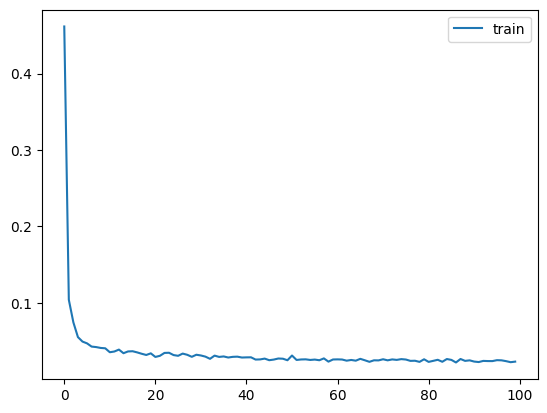

In [114]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(hops,no_cols)))
model.add(Dropout(0.4))
model.add(LSTM(units=50))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train_shape2, y_train2, epochs=100, batch_size=64)
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [115]:
df_train_last = df_lstm_train2.iloc[-14:]
df_test_full = df_lstm_test2
full_df = pd.concat((df_train_last,df_lstm_test2),axis=0)
full_df.shape

(177, 11)

In [116]:
full_df = scaler.transform(full_df)
full_df.shape

(177, 11)

In [117]:
hops = 14
no_records = 177
no_cols = 11
X_train_pred2 = []

for i in range(hops,no_records):
    X_train_pred2.append(full_df[i-14:i])
X_train_pred2 = np.array(X_train_pred2)
X_train_pred2.shape

(163, 14, 11)

In [118]:
ytest = model.predict(X_train_pred2)
yfinal_pred = scaler2.inverse_transform(ytest)

6/6 [==============================] - 4s 18ms/step


In [119]:
final_close_pred = pd.DataFrame(yfinal_pred)
final_close_pred.columns = ['final_close_pred']

In [120]:
full_final_test = pd.concat((final_close_pred,df_lstm_test2),axis=1)
full_final_test = full_final_test[['open', 'final_close_pred', 'close', 'high', 'low', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'post_date_count']]
full_final_test.head()

open  final_close_pred   close    high      low    volume    adjClose  \
0  225.07        222.787155  224.59  228.22  224.200  36187163  222.798811   
1  223.06        223.335556  218.96  223.58  217.930  35767257  217.213712   
2  218.43        221.444885  220.82  220.96  215.132  30352686  219.058878   
3  225.64        220.541656  227.01  227.49  223.890  34755553  225.199510   
4  226.27        222.603012  227.06  229.93  225.840  30889269  225.249112   

      adjHigh      adjLow     adjOpen  adjVolume  post_date_count  
0  226.399860  222.411921  223.274983   36187163            806.0  
1  221.796866  216.191927  221.281013   35767257            547.0  
2  219.197761  213.416242  216.687939   30352686            583.0  
3  225.675682  222.104394  223.840437   34755553            862.0  
4  228.096222  224.038842  224.465412   30889269            775.0

In [121]:
real_price = full_final_test['close']
predicted_price = full_final_test['final_close_pred']
rmse = math.sqrt(mean_squared_error(real_price, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 34.090


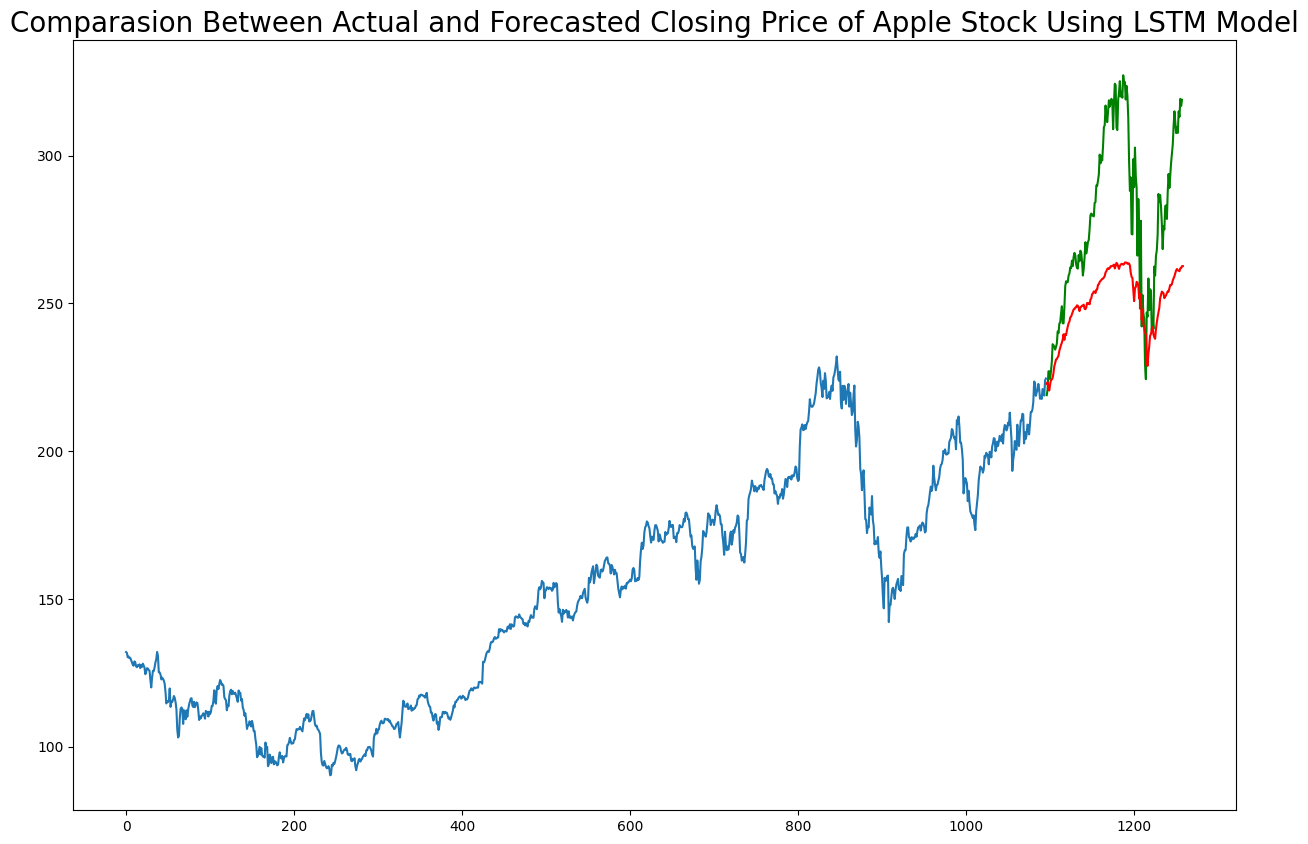

In [122]:
plt.figure(figsize=(15,10))
plt.plot(merge_data_tp["close"][:1096])
plt.plot(merge_data_tp["close"][1096:], color = "green")
plt.plot(range(1096,len(merge_data_tp)+1), full_final_test['final_close_pred'],label='forecast',color='red')
plt.title('Comparasion Between Actual and Forecasted Closing Price of Apple Stock Using LSTM Model',fontsize=20)
plt.show()